# Import libraries

In [1]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Load & Pre-process data

In [2]:
directory = '/kaggle/input/insectv2-dataset/pest/train'

labels = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
labels

['beetle',
 'mites',
 'grasshopper',
 'sawfly',
 'stem_borer',
 'mosquito',
 'armyworm',
 'aphids',
 'bollworm']

In [3]:
print("pre-processing data\n")
image_data = []
label_data = []
image_size = 150
data_dirs = ["train","test"]  # List of directories to load data from
for data_dir in data_dirs:
    for i in labels:
        data_path = os.path.join("/kaggle/input/insectv2-dataset/pest/", data_dir, i)
        for m in tqdm(os.listdir(data_path)):
            image = cv2.imread(os.path.join(data_path, m))
            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(i)
image_data = np.array(image_data)
label_data = np.array(label_data)

pre-processing data



100%|██████████| 36/36 [00:00<00:00, 442.54it/s]


In [4]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [5]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG16 Model

In [6]:
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(9, activation='softmax')(x)
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          73,737 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,788,425 (56.41 MB)

 Trainable params: 73,737 (288.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)

In [8]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - auc: 0.8257 - loss: 10.9757 - val_auc: 0.9903 - val_loss: 0.5085
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 0.9918 - loss: 0.4338 - val_auc: 0.9989 - val_loss: 0.0323
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 0.9972 - loss: 0.2111 - val_auc: 0.9989 - val_loss: 0.0840
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 0.9961 - loss: 0.2119 - val_auc: 1.0000 - val_loss: 0.0088
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 0.9983 - loss: 0.0639 - val_auc: 0.9978 - val_loss: 0.1353
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 0.9989 - loss: 0.0206 - val_auc: 0.9979 - val_loss: 0.1270
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 1.0000 - loss: 1.5310e-07 - val_auc: 0.9979 - val_loss: 0.1269
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc: 1.0000 - loss: 4.5984e-08 - val_auc: 0.9979 - val_loss: 0.1269
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━

# Accurcay & Loss

In [9]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - auc: 1.0000 - loss: 0.0056
Train Loss:  0.007951931096613407
Train Accuracy:  0.9999978542327881


In [10]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - auc: 1.0000 - loss: 0.0055
Test Loss:  0.008838986977934837
Test Accuracy:  0.9999973177909851


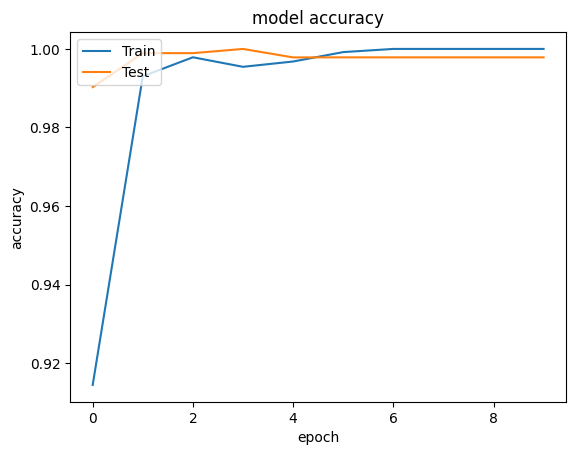

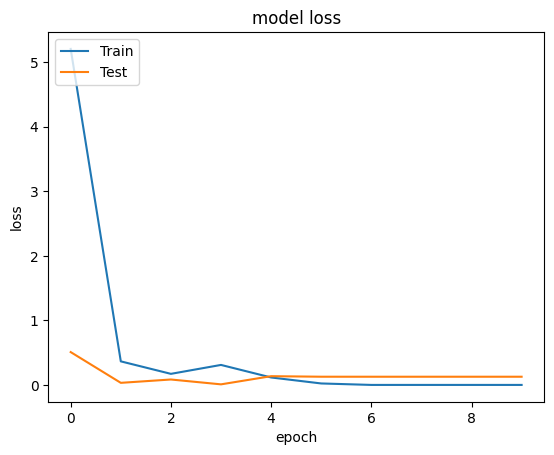

In [11]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix & Classification Report

In [12]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
[[81  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0]
 [ 0  0  0  0  0  0 54  0  0]
 [ 0  0  0  0  1  0  0 54  0]
 [ 0  0  0  0  1  0  0  0 57]]


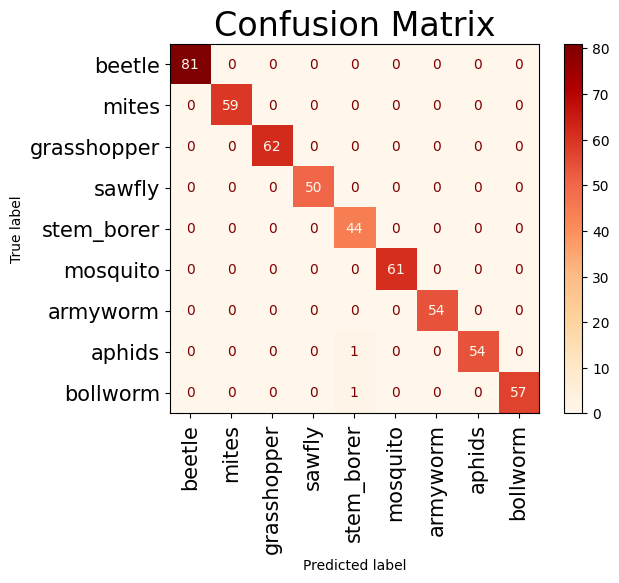

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        50
           4       0.96      1.00      0.98        44
           5       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        54
           7       1.00      0.98      0.99        55
           8       1.00      0.98      0.99        58

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



In [13]:
display_c_m.plot(cmap='OrRd', xticks_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))

# ROC Curve

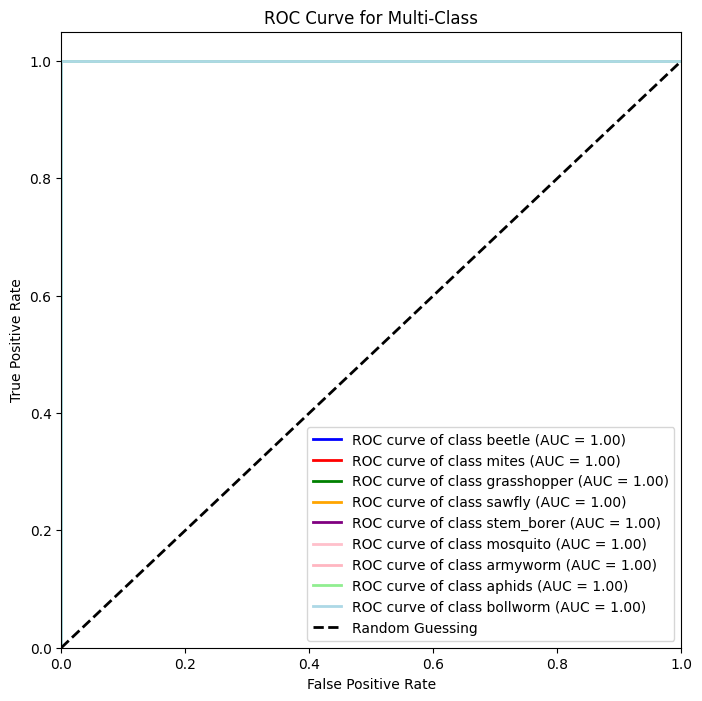

In [14]:
y_true = Y_test
y_scores = predictions
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'lightpink', 'lightgreen', 'lightblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.savefig('ROCCurve.png', transparent=True, dpi=500)
plt.show()